In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotnine as pn
import seaborn as sns 
import torch

import utils
from sklearn.metrics.pairwise import cosine_similarity, paired_distances
from scipy.spatial import distance


In [2]:
import importlib
importlib.reload(utils)


<module 'utils' from '/home/acercyc/projects/Keio Testing_analysis/src/utils.py'>

In [2]:
subj = utils.ExpInfo.getSubjIDs()[0]
# subj = 'Reg-S-5'
task = utils.ExpInfo.taskName[1]

In [3]:
# xhy = utils.LoadData.xhy(subj, task)
# xhy_disp = utils.LoadData.xhy_disp(subj, task)
d = utils.LoadData.mouseMovement_array(subj, task, velocity=True)
df_beh = utils.LoadData.behaviorData(subj, task) 

In [4]:
def get_scale(subj, task):
    from sklearn.preprocessing import StandardScaler
    _, h_all, _ = utils.LoadData.xhy_disp(subj, task)
    h_all_ = []
    for h_all_1 in h_all:
        for h_all_2 in h_all_1:
            h_all_.append(h_all_2)
    h_all = np.concatenate(h_all_)
    scale = StandardScaler().fit(h_all)
    return scale
scale = get_scale(subj, task)

In [6]:
iTrial = 6
wSize = 30
# scaling = True
scaling = False

dist_measure = 'euclidean'
# dist_measure = 'cityblock'

target = df_beh.loc[iTrial, 'target dot']
choice = df_beh.loc[iTrial, 'selected dot']




Target dot: 3
Selected dot: 3


Text(0.5, 1.0, 'average cosine_similarity')

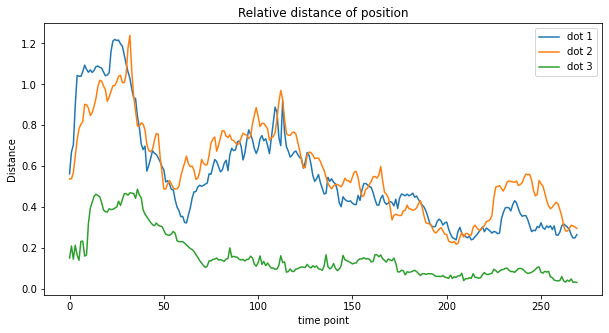

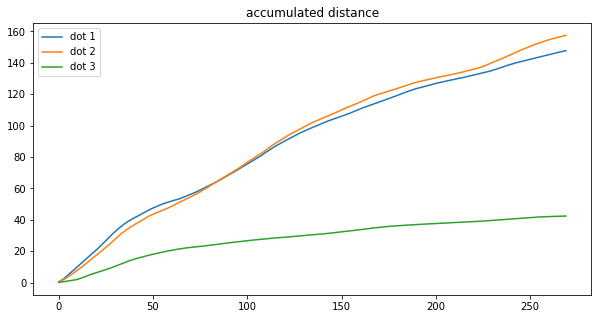

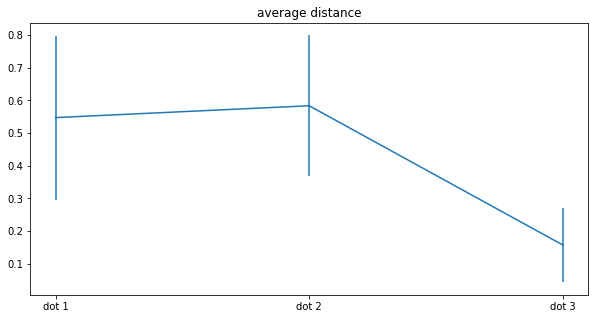

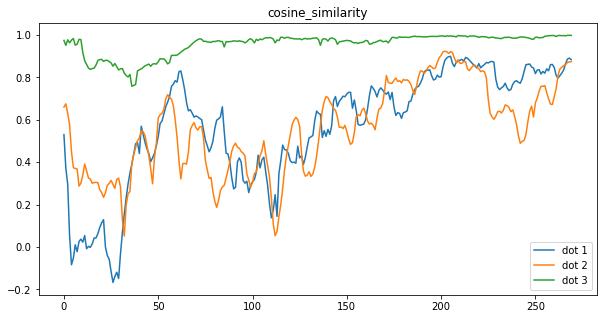

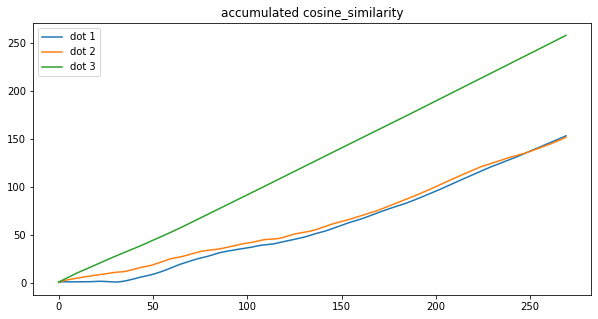

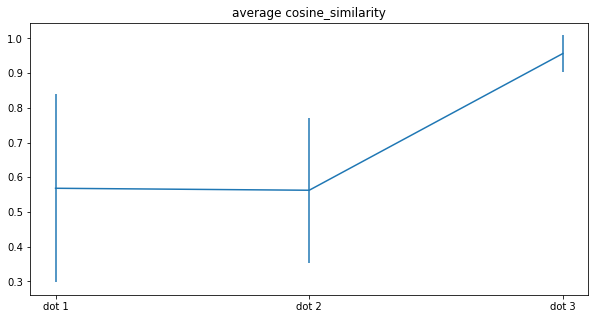

In [12]:
# ---------------------------------------------------------------------------- #
#                                compute forward                               #
# ---------------------------------------------------------------------------- #
x = d[0][iTrial]
x = utils.DataProcessing.rollingWindow(x, wSize, 1)
h, y = utils.Model.quick_forward(subj, x)

h_disp = []
for i in range(3):
    x_disp = d[1][iTrial][:, i*2:i*2+2]
    x_disp = utils.DataProcessing.rollingWindow(x_disp, wSize, 1)
    h_disp_, y_disp = utils.Model.quick_forward(subj, x_disp)   
    h_disp.append(h_disp_)


# ---------------------------------------------------------------------------- #
#                                   distance                                   #
# ---------------------------------------------------------------------------- #
dist_cos = []
dist = []
for iDot in range(3):
    h1 = h
    h2 = h_disp[iDot]
    
    # scaling
    if scaling:
        h1 = scale.transform(h1)
        h2 = scale.transform(h2)
        
    dist_cos_ = cosine_similarity(h1, h2).diagonal()
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist_cos.append(dist_cos_)
    dist.append(dist_)
    
dist = np.vstack(dist).T
dist_cos = np.vstack(dist_cos).T

# ---------------------------------------------------------------------------- #
#                                     plot                                     #
# ---------------------------------------------------------------------------- #
print(f'Target dot: {target}')
print(f'Selected dot: {choice}')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title(f'{dist_measure} Distance')
ax.set_ylabel('Distance')
ax.set_xlabel('time point')
ax.set_title('Relative distance of position')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist.mean(axis=0), yerr=dist.std(axis=0))
ax.set_title('average distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist_cos.mean(axis=0), yerr=dist_cos.std(axis=0))
ax.set_title('average cosine_similarity')


Text(0.5, 1.0, 'target')

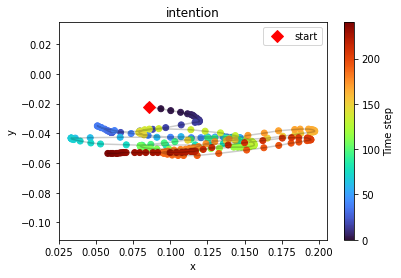

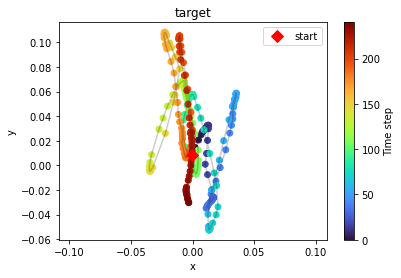

In [383]:
xy = d[0][iTrial].cumsum(axis=0)
utils.Plot.traj_withColour(xy[:, 0], xy[:, 1])
plt.title('intention')

i = target-1
xy = d[1][iTrial][:, i*2:i*2+2].cumsum(axis=0)
utils.Plot.traj_withColour(xy[:, 0], xy[:, 1])
plt.title('target')

# Action plan motion direction

Target dot: 3
Selected dot: 3


Text(0.5, 1.0, 'average cosine_similarity')

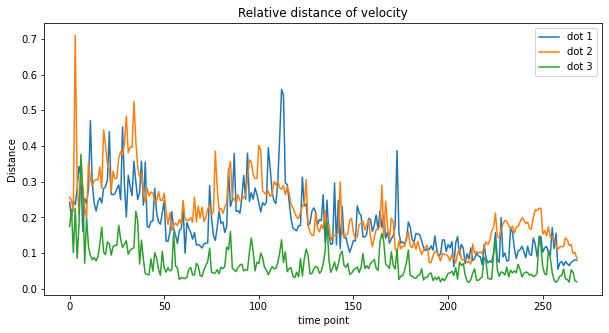

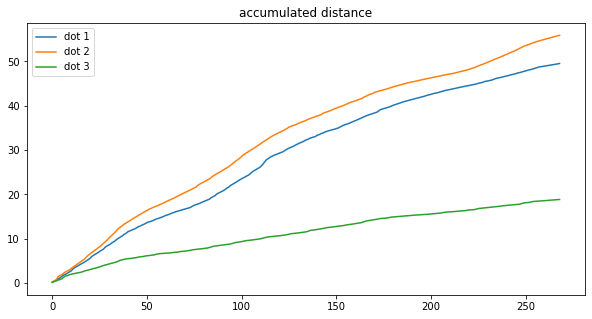

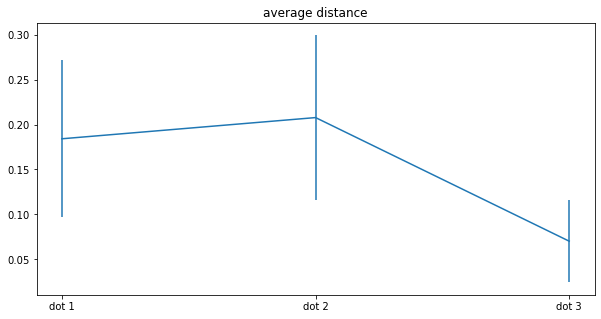

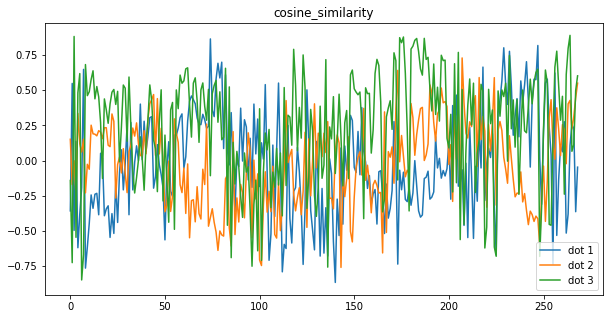

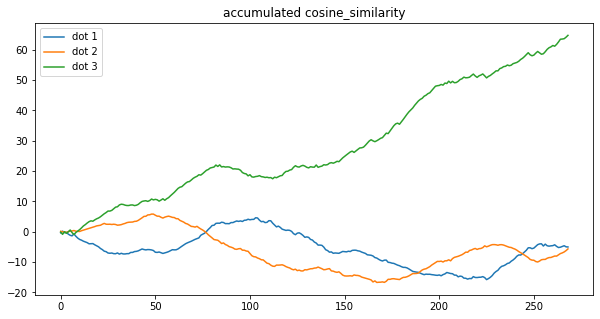

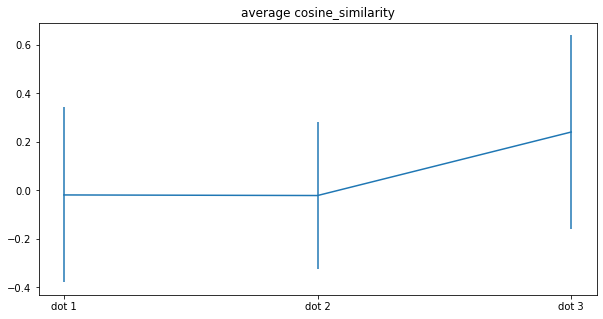

In [13]:
# ---------------------------------------------------------------------------- #
#                                   distance                                   #
# ---------------------------------------------------------------------------- #
h_diff = np.diff(h, axis=0)
dist_cos = []
dist = []
for iDot in range(3):
    h1 = h_diff
    h2 = np.diff(h_disp[iDot], axis=0)
    
    # scaling
    if scaling:
        h1 = scale.transform(h1)
        h2 = scale.transform(h2)
        
    dist_cos_ = cosine_similarity(h1, h2).diagonal()
    dist_ = paired_distances(h1, h2, metric=dist_measure)
    dist_cos.append(dist_cos_)
    dist.append(dist_)
    
dist = np.vstack(dist).T
dist_cos = np.vstack(dist_cos).T

# ---------------------------------------------------------------------------- #
#                                     plot                                     #
# ---------------------------------------------------------------------------- #
print(f'Target dot: {target}')
print(f'Selected dot: {choice}')
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title(f'{dist_measure} Distance')
ax.set_ylabel('Distance')
ax.set_xlabel('time point')
ax.set_title('Relative distance of velocity')



fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist.mean(axis=0), yerr=dist.std(axis=0))
ax.set_title('average distance')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos)
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(dist_cos.cumsum(axis=0))
ax.legend(['dot 1', 'dot 2', 'dot 3'])
ax.set_title('accumulated cosine_similarity')


fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.errorbar(['dot 1', 'dot 2', 'dot 3'],  dist_cos.mean(axis=0), yerr=dist_cos.std(axis=0))
ax.set_title('average cosine_similarity')

    

# ROC

In [385]:
# from sklearn import metrics 

# y_true = np.zeros(dist.shape)
# y_true[:, 1] = 1
# fpr, tpr, thresholds = metrics.roc_curve(y_true.flatten(), 1-dist.flatten())
# roc_auc = metrics.auc(fpr, tpr)
# metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()

# y_true = np.zeros(dist.shape)
# target = df_beh['target dot'][iTrial]-1
# y_true[:, target] = 1
# # fpr, tpr, thresholds = metrics.roc_curve(y_true.flatten(), 1-dist.flatten())
# fpr, tpr, thresholds = metrics.roc_curve(y_true.flatten(), 1-dist.flatten())
# roc_auc.append(metrics.auc(fpr, tpr))

# xy space

In [386]:
# d1 = d[0][iTrial]
# dist = []
# for i in range(3):
#     d2 = d[1][iTrial][:, i*2:i*2+2]
#     dist_ = cosine_similarity(d1, d2).diagonal()
#     # dist_ = paired_distances(d1, d2, metric=dist_measure)
#     dist.append(dist_)
# dist = np.vstack(dist).T

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.plot(dist)
# ax.legend(['dot 1', 'dot 2', 'dot 3'])

# fig, ax = plt.subplots(1, 1, figsize=(10, 5))
# ax.plot(dist.cumsum(axis=0))
# ax.legend(['dot 1', 'dot 2', 'dot 3'])
